In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import KNNImputer


In [45]:

df = pd.read_csv('../Data/data69rhone.csv')

print(df.shape)
df.head()
df_temp =  df.copy()


C:\Users\ediad\AppData\Local\Temp\ipykernel_18220\2504501126.py:1: DtypeWarning: Columns (3,27,39,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/data69rhone.csv')


(287165, 127)


In [48]:
df[['Vérification_coût_total','Somme_coûts','Coût_total_5_usages']].isnull().mean()

Vérification_coût_total   0.000000
Somme_coûts               0.000038
Coût_total_5_usages       0.000038
dtype: float64

In [52]:
# Before dropping NaN values
print("Before dropping NaN values:")
print(df.shape)

# Drop rows where 'Coût_total_5_usages' is NaN
df.dropna(subset=["Coût_total_5_usages"], inplace=True)

# After dropping NaN values
print("\nAfter dropping NaN values:")
print(df.shape)

Before dropping NaN values:
(287165, 127)

After dropping NaN values:
(287154, 127)


In [53]:
df[['Vérification_coût_total','Somme_coûts','Coût_total_5_usages']].isnull().mean()

Vérification_coût_total   0.000000
Somme_coûts               0.000000
Coût_total_5_usages       0.000000
dtype: float64

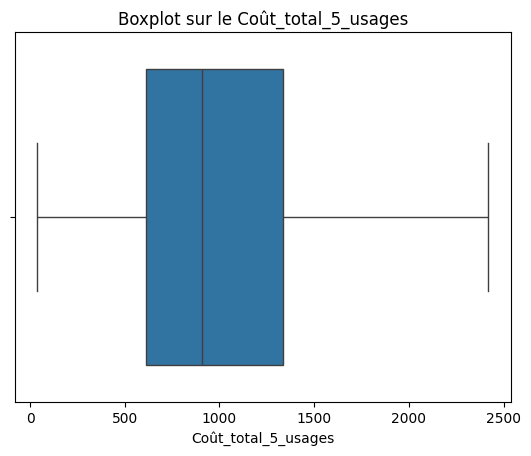

In [6]:


target = "Coût_total_5_usages"

# Créer un boxplot pour une colonne spécifique
sns.boxplot(data=df, x = target, showfliers=False)

# Afficher le graphique
plt.title(f'Boxplot sur le {target}')
plt.show()

Analyse les déciles de la variable cible (Coût_total_5_usages)

In [7]:

# Créer une séquence de 0 à 1 avec un pas de 0.1
sequence = np.arange(0, 1.1, 0.1)

# Calculer les déciles (0.1, 0.2, ..., 0.9) en ajoutant les percentiles à describe()
resultat = df[target].describe(percentiles=sequence)

Variables explicatives

In [8]:
# Vérification des données manquantes
ls_variables_explicatives = [
'Année_construction',
'Periode_construction',
'Surface_habitable_logement',
'Type_énergie_n°1',
'Etiquette_DPE',
'N°_étage_appartement',
 'Hauteur_sous-plafond',
'Logement_traversant_(0/1)',
'Présence_brasseur_air_(0/1)',
'Indicateur_confort_été',
'Isolation_toiture_(0/1)',
'Protection_solaire_exterieure_(0/1)',
'Inertie_lourde_(0/1)',
'Deperditions_baies_vitrées',
'Deperditions_enveloppe',
'Déperditions_murs',
'Deperditions_planchers_bas',
'Deperditions_planchers_hauts',
'Déperditions_ponts_thermiques',
'Déperditions_portes',
'Déperditions_renouvellement_air',
'Qualité_isolation_enveloppe',
'Qualité_isolation_menuiseries',
'Qualité_isolation_murs',
'Qualité_isolation_plancher_bas']

In [9]:
# Créer une séquence de 0 à 1 avec un pas de 0.1
sequence = np.arange(0, 1.1, 0.1)

# Calculer les déciles (0.1, 0.2, ..., 0.9) en ajoutant les percentiles à describe()
resultat = df.describe(percentiles=sequence)

In [10]:
# Vérification des données manquantes
df[ls_variables_explicatives].isnull().mean()

Année_construction                     0.356126
Periode_construction                   0.428923
Surface_habitable_logement             0.015312
Type_énergie_n°1                       0.000000
Etiquette_DPE                          0.000000
N°_étage_appartement                   0.186558
Hauteur_sous-plafond                   0.000000
Logement_traversant_(0/1)              0.464594
Présence_brasseur_air_(0/1)            0.464594
Indicateur_confort_été                 0.464594
Isolation_toiture_(0/1)                0.467683
Protection_solaire_exterieure_(0/1)    0.464594
Inertie_lourde_(0/1)                   0.476626
Deperditions_baies_vitrées             0.116652
Deperditions_enveloppe                 0.116641
Déperditions_murs                      0.116645
Deperditions_planchers_bas             0.118240
Deperditions_planchers_hauts           0.118142
Déperditions_ponts_thermiques          0.116822
Déperditions_portes                    0.117195
Déperditions_renouvellement_air        0

In [11]:
# Exemple de DataFrame
# df = pd.DataFrame(...)  # Votre DataFrame ici

# Sélectionner uniquement les colonnes quantitatives (numériques)
quant_cols = df[ls_variables_explicatives].select_dtypes(include=[np.number]).columns

# Afficher les colonnes quantitatives
print("Colonnes quantitatives :", quant_cols)

# Imputation avec la moyenne
df[quant_cols] = df[quant_cols].fillna(df[quant_cols].mean())

# Vérification des données manquantes
missing_values_after_mean_imputation = df[quant_cols].isnull().sum()
print("Valeurs manquantes après imputation avec la moyenne :", missing_values_after_mean_imputation)

Colonnes quantitatives : Index(['Année_construction', 'Surface_habitable_logement',
       'N°_étage_appartement', 'Hauteur_sous-plafond',
       'Deperditions_baies_vitrées', 'Deperditions_enveloppe',
       'Déperditions_murs', 'Deperditions_planchers_bas',
       'Deperditions_planchers_hauts', 'Déperditions_ponts_thermiques',
       'Déperditions_portes', 'Déperditions_renouvellement_air'],
      dtype='object')
Valeurs manquantes après imputation avec la moyenne : Année_construction                 0
Surface_habitable_logement         0
N°_étage_appartement               0
Hauteur_sous-plafond               0
Deperditions_baies_vitrées         0
Deperditions_enveloppe             0
Déperditions_murs                  0
Deperditions_planchers_bas         0
Deperditions_planchers_hauts       0
Déperditions_ponts_thermiques      0
Déperditions_portes                0
Déperditions_renouvellement_air    0
dtype: int64


In [12]:
# Sélectionner toutes les colonnes non numériques (qualitatives)
categorical_cols = df[ls_variables_explicatives].select_dtypes(exclude=[np.number]).columns

# Appliquer l'imputation par la valeur la plus fréquente (mode) pour chaque colonne catégorielle
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Vérification des données manquantes
df[categorical_cols].isnull().sum()

C:\Users\ediad\AppData\Local\Temp\ipykernel_18220\3031881694.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


Periode_construction                   0
Type_énergie_n°1                       0
Etiquette_DPE                          0
Logement_traversant_(0/1)              0
Présence_brasseur_air_(0/1)            0
Indicateur_confort_été                 0
Isolation_toiture_(0/1)                0
Protection_solaire_exterieure_(0/1)    0
Inertie_lourde_(0/1)                   0
Qualité_isolation_enveloppe            0
Qualité_isolation_menuiseries          0
Qualité_isolation_murs                 0
Qualité_isolation_plancher_bas         0
dtype: int64

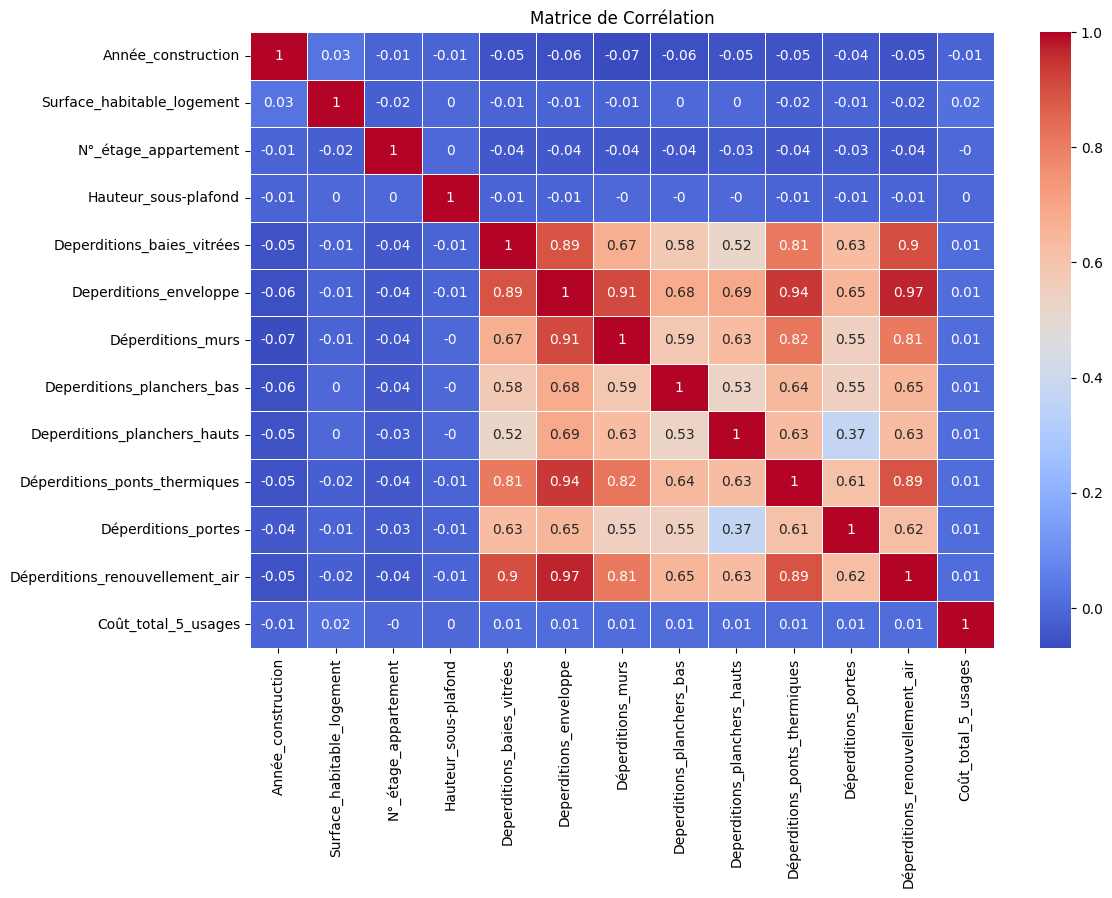

In [13]:
# Calcul de la matrice de corrélation
corr_matrix = round(df[list(quant_cols) + [target] ].corr(),2)
# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

In [14]:
# Concaténer les deux listes : ls_variables_explicatives et target
df = df[list(ls_variables_explicatives) + [target]]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [15]:
# Utiliser set.difference() pour exclure la colonne cible de ls_variables_explicatives
X =df[df.columns.difference([target])]

In [16]:
Y = df[target]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [18]:
print(X_train.shape)
print(X_test.shape)
X_test.head()

(201007, 54)
(86147, 54)


,Année_construction,Deperditions_baies_vitrées,Deperditions_enveloppe,Deperditions_planchers_bas,Deperditions_planchers_hauts,Déperditions_murs,Déperditions_ponts_thermiques,Déperditions_portes,Déperditions_renouvellement_air,Etiquette_DPE_B,...,Type_énergie_n°1_Bois – Plaquettes forestières,Type_énergie_n°1_Butane,Type_énergie_n°1_Charbon,Type_énergie_n°1_Fioul domestique,Type_énergie_n°1_GPL,Type_énergie_n°1_Gaz naturel,Type_énergie_n°1_Propane,Type_énergie_n°1_Réseau de Chauffage urbain,Type_énergie_n°1_Électricité,Type_énergie_n°1_Électricité d'origine renouvelable utilisée dans le bâtiment
255476,2024.000000,491.126182,2569.665647,58.609255,100.21468,643.17568,432.814115,32.076689,812.404655,False,...,False,False,False,False,False,True,False,False,False,False
228422,1947.000000,48.400000,273.700000,12.200000,12.90000,39.20000,68.500000,0.000000,92.500000,False,...,False,False,False,False,False,True,False,False,False,False
13619,1982.762828,62.400000,6960.700000,110.800000,33.60000,3843.80000,666.000000,32.100000,2212.100000,False,...,False,False,False,False,False,False,False,True,False,False
248793,1970.000000,25.500000,258.800000,0.000000,82.50000,58.00000,32.300000,3.200000,57.300000,False,...,False,False,False,False,False,True,False,False,False,False
254847,2024.000000,491.126182,2569.665647,58.609255,100.21468,643.17568,432.814115,32.076689,812.404655,True,...,False,False,False,False,False,True,False,False,False,False


In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train,y_train)

In [20]:
coef = pd.DataFrame(lr_model.coef_ ,index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = lr_model.intercept_
coef

,Coef
Année_construction,-10.113362
Deperditions_baies_vitrées,4.439100
Deperditions_enveloppe,-4.271751
Deperditions_planchers_bas,6.079932
Deperditions_planchers_hauts,4.111062
Déperditions_murs,4.496019
Déperditions_ponts_thermiques,4.035066
Déperditions_portes,2.825670
Déperditions_renouvellement_air,4.272679
Etiquette_DPE_B,137.958855


In [21]:
y_pred = lr_model.predict(X_test)
y_pred

array([ 885.71283437,  877.05627265, 2973.87873261, ..., 2076.65609818,
        864.09318184, 1096.45545208])

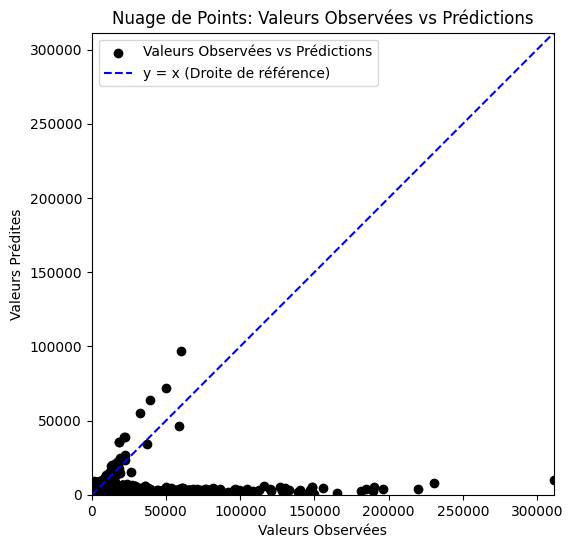

In [22]:
# Taille de la figure
plt.figure(figsize=(10, 6))

# Nuage de points pour les valeurs observées et prédites
plt.scatter(y_test, y_pred, color='black', label='Valeurs Observées vs Prédictions')

# Tracer la droite d'équation y = x
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='blue', linestyle='--', label='y = x (Droite de référence)')

# Définir les limites des axes
plt.xlim(0, max_val)
plt.ylim(0, max_val)

# Assurer que les axes ont la même échelle
plt.gca().set_aspect('equal', adjustable='box')

# Ajouter des labels et une légende
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('Nuage de Points: Valeurs Observées vs Prédictions')
plt.legend()

# Afficher le graphique
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("MAE : " + str(mean_absolute_error(y_test, y_pred)))
print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

MAE : 1189.59345006748
RMSE : 4629.9668725907795
R² : 0.01520478779786516


c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Ajuster (fit) le scaler uniquement sur les données d'entraînement et appliquer la transformation (fit_transform)
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la transformation sur les données de test (transform uniquement, sans fit)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Initialiser le StandardScaler pour les cibles (y)
scaler_y = StandardScaler()

# Convertir y_train et y_test en tableau NumPy pour appliquer reshape
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1))

In [26]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train_scaled,y_train_scaled)

In [27]:
# Aplatir le coefficient du modèle pour correspondre à l'index des colonnes de X_train
coef_scaled = pd.DataFrame(lr_model.coef_.flatten(), index=X_train.columns, columns=['Coef'])

# Ajouter l'intercept (biais) au DataFrame
coef_scaled.loc['Constante'] = lr_model.intercept_[0]  # Si intercept_ est un tableau

# Modifier l'affichage global des nombres en pandas pour utiliser un format décimal avec 6 chiffres après la virgule
pd.options.display.float_format = '{:.6f}'.format

# Affichage des coefficients avec les nouvelles options
coef_scaled

,Coef
Année_construction,-0.006243
Deperditions_baies_vitrées,0.123839
Deperditions_enveloppe,-0.583338
Deperditions_planchers_bas,0.018761
Deperditions_planchers_hauts,0.029376
Déperditions_murs,0.197828
Déperditions_ponts_thermiques,0.101201
Déperditions_portes,0.006915
Déperditions_renouvellement_air,0.175460
Etiquette_DPE_B,0.000627


In [28]:
y_pred = lr_model.predict(X_test_scaled)
print("MAE : " + str(mean_absolute_error(y_test_scaled, y_pred)))
print("RMSE : " + str(mean_squared_error(y_test_scaled, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test_scaled, y_pred)))

MAE : 0.027974895612812068
RMSE : 0.10887992023171474
R² : 0.015204787797879482


c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
y_pred = scaler_y.inverse_transform(y_pred)
y_pred

array([[ 885.71283437],
       [ 877.05627265],
       [2973.87873261],
       ...,
       [2076.65609818],
       [ 864.09318184],
       [1096.45545208]])

In [30]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0)
ridge_model = ridge_model.fit(X_train_scaled,y_train_scaled)

In [31]:
# Aplatir le coefficient du modèle pour correspondre à l'index des colonnes de X_train
coef_scaled = pd.DataFrame(ridge_model.coef_.flatten(), index=X_train.columns, columns=['Coef'])

# Ajouter l'intercept (biais) au DataFrame
coef_scaled.loc['Constante'] = ridge_model.intercept_[0]  # Si intercept_ est un tableau

# Modifier l'affichage global des nombres en pandas pour utiliser un format décimal avec 6 chiffres après la virgule
pd.options.display.float_format = '{:.6f}'.format

# Affichage des coefficients avec les nouvelles options
coef_scaled

,Coef
Année_construction,-0.006243
Deperditions_baies_vitrées,0.123839
Deperditions_enveloppe,-0.583338
Deperditions_planchers_bas,0.018761
Deperditions_planchers_hauts,0.029376
Déperditions_murs,0.197828
Déperditions_ponts_thermiques,0.101201
Déperditions_portes,0.006915
Déperditions_renouvellement_air,0.175460
Etiquette_DPE_B,0.000627


In [32]:
# Générer des valeurs d'alpha (logarithmique entre 1e-5 et 1e3)
alphas = np.logspace(-5, 3, 100)
print(alphas)

[1.00000000e-05 1.20450354e-05 1.45082878e-05 1.74752840e-05
 2.10490414e-05 2.53536449e-05 3.05385551e-05 3.67837977e-05
 4.43062146e-05 5.33669923e-05 6.42807312e-05 7.74263683e-05
 9.32603347e-05 1.12332403e-04 1.35304777e-04 1.62975083e-04
 1.96304065e-04 2.36448941e-04 2.84803587e-04 3.43046929e-04
 4.13201240e-04 4.97702356e-04 5.99484250e-04 7.22080902e-04
 8.69749003e-04 1.04761575e-03 1.26185688e-03 1.51991108e-03
 1.83073828e-03 2.20513074e-03 2.65608778e-03 3.19926714e-03
 3.85352859e-03 4.64158883e-03 5.59081018e-03 6.73415066e-03
 8.11130831e-03 9.77009957e-03 1.17681195e-02 1.41747416e-02
 1.70735265e-02 2.05651231e-02 2.47707636e-02 2.98364724e-02
 3.59381366e-02 4.32876128e-02 5.21400829e-02 6.28029144e-02
 7.56463328e-02 9.11162756e-02 1.09749877e-01 1.32194115e-01
 1.59228279e-01 1.91791026e-01 2.31012970e-01 2.78255940e-01
 3.35160265e-01 4.03701726e-01 4.86260158e-01 5.85702082e-01
 7.05480231e-01 8.49753436e-01 1.02353102e+00 1.23284674e+00
 1.48496826e+00 1.788649

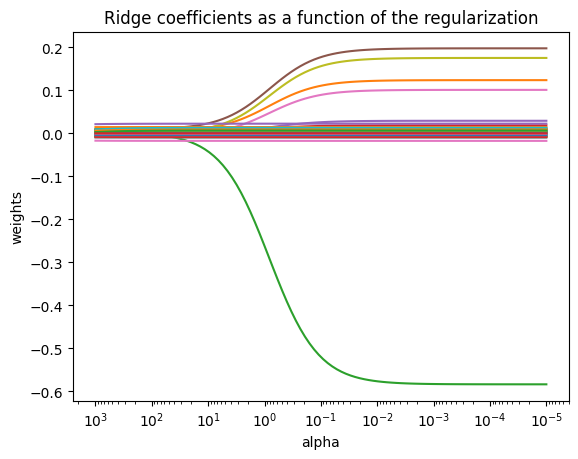

In [33]:
# Initialiser un tableau pour stocker les coefficients
coefs = []

# Pour chaque alpha, ajuster le modèle Ridge et stocker les coefficients
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train_scaled)
    coefs.append(ridge_model.coef_.flatten())  # Stocker les coefficients aplatis (1D)

# Convertir les coefficients en array pour pouvoir les tracer
coefs = np.array(coefs)

# Tracer les coefficients en fonction des alphas
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Inverser l'axe pour que les alphas décroissent
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [34]:
from sklearn.linear_model import Lasso
lass_model = Lasso(alpha=0)
lass_model = lass_model.fit(X_train_scaled,y_train_scaled)

c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+05, tolerance: 2.010e+01 Line

In [35]:
# Aplatir le coefficient du modèle pour correspondre à l'index des colonnes de X_train
coef_scaled = pd.DataFrame(lass_model.coef_.flatten(), index=X_train.columns, columns=['Coef'])

# Ajouter l'intercept (biais) au DataFrame
coef_scaled.loc['Constante'] = lass_model.intercept_[0]  # Si intercept_ est un tableau

# Modifier l'affichage global des nombres en pandas pour utiliser un format décimal avec 6 chiffres après la virgule
pd.options.display.float_format = '{:.6f}'.format

# Affichage des coefficients avec les nouvelles options
coef_scaled

,Coef
Année_construction,-0.006275
Deperditions_baies_vitrées,0.003648
Deperditions_enveloppe,0.004954
Deperditions_planchers_bas,0.005498
Deperditions_planchers_hauts,-0.001389
Déperditions_murs,0.008264
Déperditions_ponts_thermiques,-0.006811
Déperditions_portes,-0.003622
Déperditions_renouvellement_air,-0.001491
Etiquette_DPE_B,0.000591


In [36]:
# Générer des valeurs d'alpha (logarithmique entre 1e-5 et 1e3)
alphas = np.logspace(-5, 3, 100)
print(alphas)

[1.00000000e-05 1.20450354e-05 1.45082878e-05 1.74752840e-05
 2.10490414e-05 2.53536449e-05 3.05385551e-05 3.67837977e-05
 4.43062146e-05 5.33669923e-05 6.42807312e-05 7.74263683e-05
 9.32603347e-05 1.12332403e-04 1.35304777e-04 1.62975083e-04
 1.96304065e-04 2.36448941e-04 2.84803587e-04 3.43046929e-04
 4.13201240e-04 4.97702356e-04 5.99484250e-04 7.22080902e-04
 8.69749003e-04 1.04761575e-03 1.26185688e-03 1.51991108e-03
 1.83073828e-03 2.20513074e-03 2.65608778e-03 3.19926714e-03
 3.85352859e-03 4.64158883e-03 5.59081018e-03 6.73415066e-03
 8.11130831e-03 9.77009957e-03 1.17681195e-02 1.41747416e-02
 1.70735265e-02 2.05651231e-02 2.47707636e-02 2.98364724e-02
 3.59381366e-02 4.32876128e-02 5.21400829e-02 6.28029144e-02
 7.56463328e-02 9.11162756e-02 1.09749877e-01 1.32194115e-01
 1.59228279e-01 1.91791026e-01 2.31012970e-01 2.78255940e-01
 3.35160265e-01 4.03701726e-01 4.86260158e-01 5.85702082e-01
 7.05480231e-01 8.49753436e-01 1.02353102e+00 1.23284674e+00
 1.48496826e+00 1.788649

c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.492e+04, tolerance: 2.010e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.799e+04, tolerance: 2.010e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\linear_model\_coordinate_descent

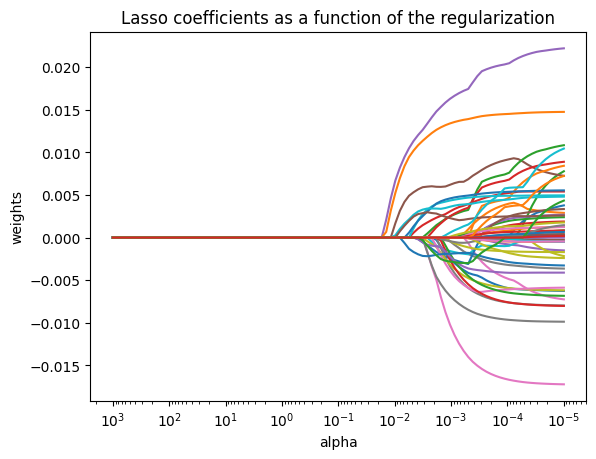

In [37]:
# Initialiser un tableau pour stocker les coefficients
coefs = []

# Pour chaque alpha, ajuster le modèle Lasso et stocker les coefficients
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=100)  # max_iter augmenté pour assurer la convergence
    lasso_model.fit(X_train_scaled, y_train_scaled)
    coefs.append(lasso_model.coef_.flatten())  # Stocker les coefficients aplatis (1D)

# Convertir les coefficients en array pour pouvoir les tracer
coefs = np.array(coefs)

# Tracer les coefficients en fonction des alphas
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Inverser l'axe pour que les alphas décroissent
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

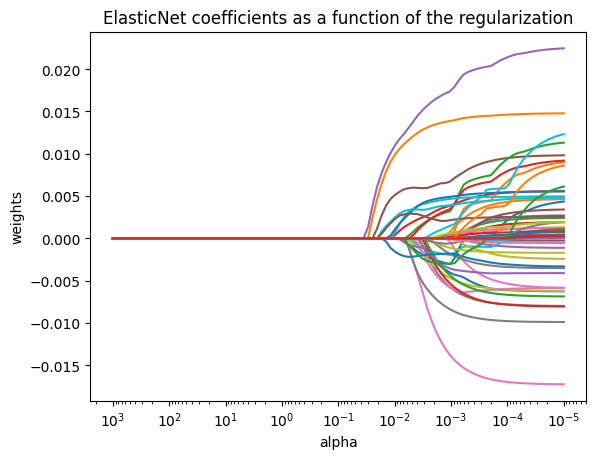

In [38]:
from sklearn.linear_model import ElasticNet

# Générer des valeurs d'alpha (logarithmique entre 1e-5 et 1e3)
alphas = np.logspace(-5, 3, 100)

# Initialiser un tableau pour stocker les coefficients
coefs = []

# Paramètre l1_ratio : ici on peut choisir une valeur qui balance Lasso et Ridge (par exemple 0.5)
l1_ratio = 0.5  # L1 et L2 sont équilibrés

# Pour chaque alpha, ajuster le modèle ElasticNet et stocker les coefficients
for alpha in alphas:
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)  # max_iter pour convergence
    elasticnet_model.fit(X_train_scaled, y_train_scaled)
    coefs.append(elasticnet_model.coef_.flatten())  # Stocker les coefficients aplatis (1D)

# Convertir les coefficients en array pour pouvoir les tracer
coefs = np.array(coefs)

# Tracer les coefficients en fonction des alphas
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Inverser l'axe pour que les alphas décroissent
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("ElasticNet coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE : 2.1442689098266423
MAE : 0.014538164168338186


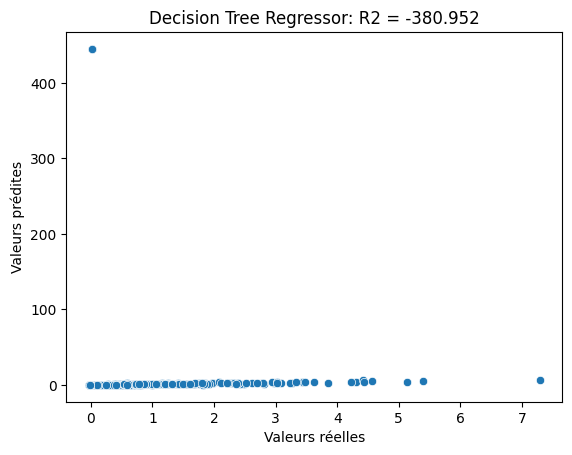

R2 : -380.9520434872677
RMSE : 2.1442689098266423
MAE : 0.014538164168338186


c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

tree_model = DecisionTreeRegressor(max_depth = 40,min_samples_split = 2, min_samples_leaf = 1)

tree_model.fit(X_train_scaled, y_train_scaled)

y_pred = tree_model.predict(X_test_scaled)
print("RMSE : " + str(mean_squared_error(y_test_scaled, y_pred, squared= False)))
print("MAE : " + str(mean_absolute_error(y_test_scaled, y_pred)))

# Aplatir y_test_scaled pour le rendre 1D
y_test_scaled = y_test_scaled.flatten()  # Transforme en vecteur 1D

# Affichage du scatterplot
sns.scatterplot(x=y_test_scaled, y=y_pred, legend=None)
plt.title(f'Decision Tree Regressor: R2 = {r2_score(y_test_scaled, y_pred):.3f}')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

# Affichage des autres métriques
print("R2 : " + str(r2_score(y_test_scaled, y_pred)))
print("RMSE : " + str(mean_squared_error(y_test_scaled, y_pred, squared=False)))
print("MAE : " + str(mean_absolute_error(y_test_scaled, y_pred)))

In [40]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.tree import export_graphviz
import graphviz

# Exporter l'arbre au format DOT
dot_data = export_graphviz(tree_model, out_file=None, 
                           feature_names=X_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  
# Visualiser avec graphviz
graph = graphviz.Source(dot_data)  
graph.render("tree_model", format="png", view=True)  # Sauvegarder et ouvrir l'arbre

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE : 0.33630186199617473
MAE : 0.013358858904161181
R2 : -8.39526175554362


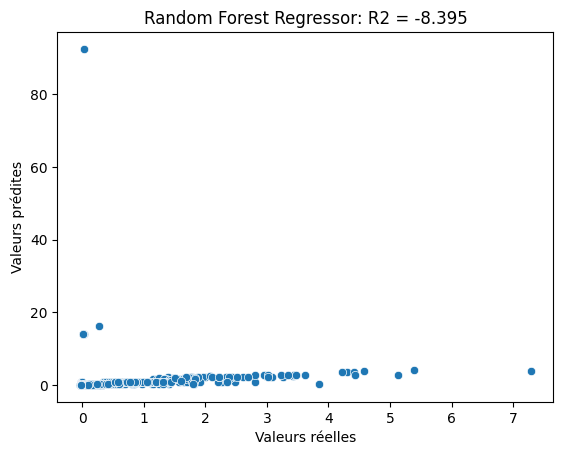

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Créer et entraîner un modèle de forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test_scaled)

# Calcul des métriques
print("RMSE : " + str(mean_squared_error(y_test_scaled, y_pred, squared=False)))
print("MAE : " + str(mean_absolute_error(y_test_scaled, y_pred)))
print("R2 : " + str(r2_score(y_test_scaled, y_pred)))

# Aplatir y_test_scaled pour le rendre 1D
y_test_scaled = y_test_scaled.flatten()  # Transforme en vecteur 1D

# Affichage du scatterplot
sns.scatterplot(x=y_test_scaled, y=y_pred, legend=None)
plt.title(f'Random Forest Regressor: R2 = {r2_score(y_test_scaled, y_pred):.3f}')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

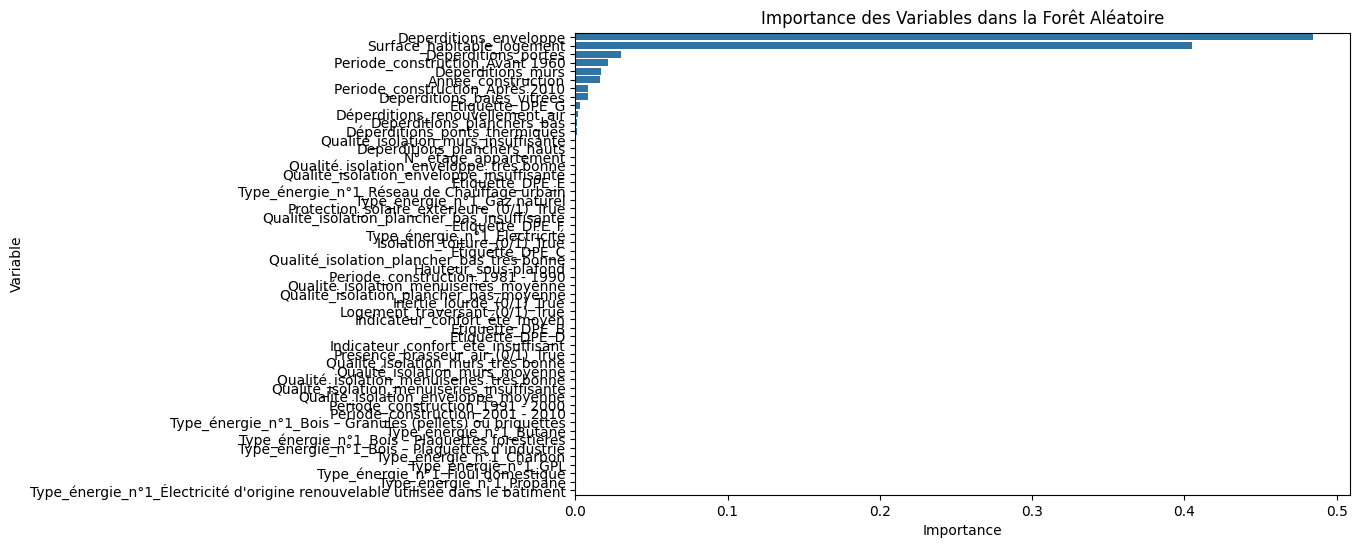

                                              Feature  Importance
2                              Deperditions_enveloppe    0.484615
41                         Surface_habitable_logement    0.405167
7                                 Déperditions_portes    0.030264
26                    Periode_construction_Avant 1960    0.021369
5                                   Déperditions_murs    0.016822
0                                  Année_construction    0.016525
25                    Periode_construction_Après 2010    0.008332
1                          Deperditions_baies_vitrées    0.008055
14                                    Etiquette_DPE_G    0.003182
8                     Déperditions_renouvellement_air    0.001633
3                          Deperditions_planchers_bas    0.001120
6                       Déperditions_ponts_thermiques    0.000979
35                Qualité_isolation_murs_insuffisante    0.000521
4                        Deperditions_planchers_hauts    0.000299
21        

In [43]:
# Extraire les importances des variables
importances = rf_model.feature_importances_

# Créer un DataFrame avec les importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Trier les variables par importance (en ordre décroissant)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage de l'importance des variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importance des Variables dans la Forêt Aléatoire')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

# Afficher le DataFrame des importances
print(importance_df)